# Tutorial: use DAindex for quantifying health inequality
This tutorial is a very simple example involving:
- generate a random dataframe with multimorbidity numbers for two groups of patients: female and male.
- assume that number of multimorbidities >= 3 is deemed frail and the higher the number the more frail the patient is.
- use DAindex to quantify the inequality between female and male.

In [1]:
import pandas as pd
import numpy as np

## 1. generate sample data

In [2]:
n_size = 100

In [3]:
female_mm = [int(m) for m in np.random.normal(3.2, .5, size=n_size)]
df_female = pd.DataFrame(dict(mm=female_mm,
                            gender=['f'] * n_size
                           ))
df_female.head()

,mm,gender
0,2,f
1,2,f
2,3,f
3,3,f
4,2,f


In [4]:
male_mm = [int(m) for m in np.random.normal(3, .5, size=n_size)]
df_male = pd.DataFrame(dict(mm=male_mm,
                            gender=['m'] * n_size
                           ))
df_male.head()

,mm,gender
0,3,m
1,2,m
2,2,m
3,4,m
4,2,m


In [5]:
df = pd.concat([df_female, df_male], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mm      200 non-null    int64 
 1   gender  200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


## 2. import DAindex and quantify the inequality
If DAindex is not installed, run 
```python
!pip install DAindex
```

In [6]:
from DAindex import Util as qutil

/Users/honghan.wu/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [         nan  23.23062002   9.36767641   1.25837431  -4.49484801
  -8.93384797 -12.38704256 -14.89635534 -16.59133041 -17.72633741
 -18.53890755 -19.18929533 -19.76925922 -20.325904   -20.88094049
 -21.44278001 -22.01331612 -22.59149283 -23.17510213 -23.7616535 ]
  warnings.warn(
/Users/honghan.wu/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [         nan -12.08285914   1.12919725  -1.96621596  -5.96460021
  -9.59268319 -12.61681995 -14.90615956 -16.52120281 -17.65445178
 -18.49350688 -19.17307263 -19.77612921 -20.3485012  -20.91311238
 -21.48004487 -22.05264902 -22.6309658  -23.2135547  -23.79843762]
  warnings.warn(


({'overall-prob': 0.97, 'one-step': 0.62, 'k-step': 0.059112, '|X|': 100},
 {'overall-prob': 0.9999, 'one-step': 0.5, 'k-step': 0.031392, '|X|': 100},
 0.8830275229357796)

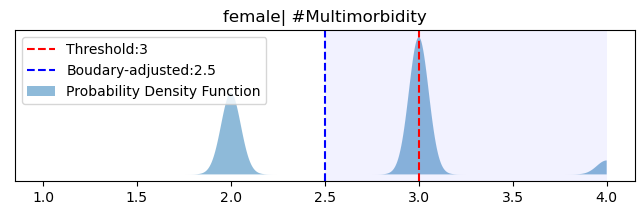

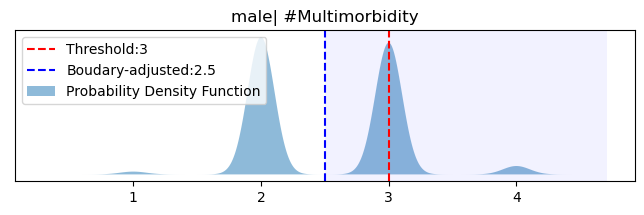

In [7]:
qutil.compare_two_groups(df[df.gender=='f'], df[df.gender=='m'], 'mm', 'female', 'male', '#Multimorbidity', 3, is_discrete=True)